In [20]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import matplotlib.patches as patches
warnings.filterwarnings("ignore")
from mplsoccer.pitch import Pitch
plt.style.use('ggplot')
from PIL import Image
from highlight_text import htext
from matplotlib import cm
import matplotlib.patheffects as path_effects
from scipy.spatial import ConvexHull
from matplotlib.patches import Arc
%matplotlib inline

In [21]:
with open('Leeds_Fulham.json') as json_file:
    data = json.load(json_file)

event = []
minute = []
second = []
player = []
team = []
outcome = []
x = []
y = []
endX = []
endY = []
goal = []
passtype = []


for each in data['events']:
    event.append(each['type']['displayName'])
    try:
        minute.append(each['minute'])
    except:
        minute.append('')
    try:
        second.append(each['second'])
    except:
        second.append('')
    try:
        player.append(each['playerId'])
    except:
        player.append('')
    try:
        team.append(each['teamId'])
    except:
        team.append('')
    try:
        endX.append(each['endX'])
        endY.append(each['endY'])
    except:
        endX.append('')
        endY.append('')
    outcome.append(each['outcomeType']['displayName'])
    x.append(each['x'])
    y.append(each['y'])

    for key, value in each.items():
        passType = 'OpenPlay'
        if key == 'qualifiers':
            for item in value:
                if item['type']['displayName'] == 'IntentionalGoalAssist':
                    passType = item['type']['displayName']
                elif item['type']['displayName'] == 'BigChanceCreated':
                    passType = item['type']['displayName']
                elif item['type']['displayName'] == 'Assisted':
                    passType = item['type']['displayName']
            passtype.append(passType)
                
events = pd.DataFrame({'Event':event, 'Minute':minute, 'Second':second, 'Player':player, 'Team':team, 'Outcome':outcome, 'x':x, 'y':y,
                      'endX':endX, 'endY':endY, 'passtype':passtype})

In [22]:
# data

In [23]:
# '134143': 'Stuart Dallas'
# '82877': 'Luke Ayling'

In [24]:
ball recovery, & fouls

SyntaxError: invalid syntax (<ipython-input-24-45803870c7df>, line 1)

In [25]:
events.Event.value_counts()

Pass               980
BallRecovery       137
BallTouch           87
Aerial              76
Foul                62
TakeOn              49
Tackle              40
Challenge           32
Clearance           28
Dispossessed        26
Interception        26
BlockedPass         19
CornerAwarded       16
KeeperPickup        16
Save                10
SavedShot           10
Goal                 7
End                  6
MissedShots          6
SubstitutionOn       5
SubstitutionOff      5
Start                4
Card                 3
OffsideProvoked      3
OffsideGiven         3
OffsidePass          3
Punch                3
FormationSet         2
PenaltyFaced         2
FormationChange      1
ShotOnPost           1
Smother              1
Name: Event, dtype: int64

In [26]:
mask = ((events['Player']==134143) & (events['Event'] == 'Tackle')) | ((events['Player']==134143) & (events['Event'] == 'Challenge')) | ((events['Player']==134143) & (events['Event'] == 'Interception')) | ((events['Player']==134143) & (events['Event'] == 'BlockedPass')) | ((events['Player']==134143) & (events['Event'] == 'BallRecovery')) | ((events['Player']==134143) & (events['Event'] == 'Foul'))
dallas = events.loc[mask]
dallas

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype
171,BallRecovery,10,20,134143,19,Successful,18.8,83.3,,,OpenPlay
399,BallRecovery,23,36,134143,19,Successful,38.6,68.4,,,OpenPlay
479,Tackle,28,0,134143,19,Successful,46.9,97.0,,,OpenPlay
508,Tackle,30,0,134143,19,Successful,26.6,96.3,,,OpenPlay
637,BallRecovery,37,39,134143,19,Successful,15.3,60.6,,,OpenPlay
663,BallRecovery,41,2,134143,19,Successful,47.4,78.7,,,OpenPlay
733,Challenge,44,29,134143,19,Unsuccessful,23.6,94.0,,,OpenPlay
950,BallRecovery,53,10,134143,19,Successful,60.0,71.7,,,OpenPlay
953,Foul,53,13,134143,19,Successful,67.0,67.3,,,OpenPlay
998,BallRecovery,57,44,134143,19,Successful,30.5,77.3,,,OpenPlay


In [27]:
mask = ((events['Player']==82877) & (events['Event'] == 'Tackle')) | ((events['Player']==82877) & (events['Event'] == 'Challenge')) | ((events['Player']==82877) & (events['Event'] == 'Interception')) | ((events['Player']==82877) & (events['Event'] == 'BlockedPass')) | ((events['Player']==82877) & (events['Event'] == 'BallRecovery')) | ((events['Player']==82877) & (events['Event'] == 'Foul'))
ayling = events.loc[mask]
ayling

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype
27,Tackle,1,0,82877,19,Unsuccessful,21.5,9.4,,,OpenPlay
90,BallRecovery,6,29,82877,19,Successful,44.7,45.7,,,OpenPlay
297,BallRecovery,19,21,82877,19,Successful,35.7,11.7,,,OpenPlay
448,Challenge,26,29,82877,19,Unsuccessful,86.8,19.8,,,OpenPlay
461,Tackle,26,50,82877,19,Successful,67.6,4.4,,,OpenPlay
531,BallRecovery,31,14,82877,19,Successful,26.9,22.2,,,OpenPlay
623,BallRecovery,37,4,82877,19,Successful,1.0,11.1,,,OpenPlay
834,Tackle,45,52,82877,19,Successful,14.7,21.1,,,OpenPlay
907,BallRecovery,51,8,82877,19,Successful,68.8,8.3,,,OpenPlay
1014,Challenge,58,19,82877,19,Unsuccessful,35.3,2.7,,,OpenPlay


In [28]:
defpoints = dallas[['x', 'y']].values

In [37]:
hull = ConvexHull(dallas[['x','y']])

In [40]:
defpoints1 = ayling[['x', 'y']].values

In [41]:
hull1 = ConvexHull(ayling[['x','y']])

In [111]:
# background = "#313332"
# line = '#696969'
# text_color ='white'
# touches = '#f62681'
# assisted = "#45c7e8"
# goal = '#59c08a'
# title_font = "BBC Reith Sans"
# body_font = "BBC Reith Sans"

# #Plot the X & Y location with dots
# pitch = Pitch(figsize=(15,15),orientation='vertical',view='full',layout=(1, 2),goal_type='box',pitch_type='opta',
#               pitch_color=background, line_color=line,constrained_layout=False)


# fig, ax = pitch.draw()
# ax[0].scatter(dallas['y'],dallas['x'],color='lightblue', s=100, zorder=12,alpha=0.7, ec=background,lw=1.5)

# for simplex in hull.simplices:
#     #Draw a black line between each
#     ax[0].plot(defpoints[simplex, 1], defpoints[simplex, 0], 'k-', alpha=0.5, lw=1, c='lightblue')
#     ax[0].fill(defpoints[hull.vertices,1], defpoints[hull.vertices,0], 'k', alpha=0.01, color='lightblue')
    
# ax[0].scatter(ayling['y'],ayling['x'],color='#45c7e8', s=100, zorder=12,alpha=0.7, ec=background,lw=1.5)

# for simplex in hull1.simplices:
#     #Draw a black line between each
#     ax[0].plot(defpoints1[simplex, 1], defpoints1[simplex, 0], 'k-', alpha=0.5, lw=1, c='#45c7e8')
#     ax[0].fill(defpoints1[hull1.vertices,1], defpoints1[hull1.vertices,0], 'k', alpha=0.01, color='#45c7e8')

    
# plt.rcParams['axes.facecolor']=background
# plt.rcParams['savefig.facecolor']=background
# plt.savefig("convex",bbox_inches="tight",dpi=200);

In [105]:
mask = ((events['Team']==19) & (events['Event'] == 'Aerial'))
aerial = events.loc[mask]
aerial

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype
6,Aerial,0,7,276205,19,Unsuccessful,40.6,53.8,,,OpenPlay
11,Aerial,0,12,276205,19,Successful,39.6,66.2,,,OpenPlay
22,Aerial,0,55,276205,19,Successful,21.8,30.7,,,OpenPlay
108,Aerial,7,5,270446,19,Unsuccessful,11.2,46.4,,,OpenPlay
199,Aerial,12,13,276205,19,Unsuccessful,8.4,51.3,,,OpenPlay
228,Aerial,15,7,276205,19,Successful,45.4,35.9,,,OpenPlay
353,Aerial,21,48,317896,19,Unsuccessful,30.4,63.8,,,OpenPlay
355,Aerial,21,51,44148,19,Successful,23.4,50.1,,,OpenPlay
419,Aerial,25,0,276205,19,Successful,91.6,45.6,,,OpenPlay
427,Aerial,25,33,276205,19,Unsuccessful,95.4,46.4,,,OpenPlay


In [106]:
mask = ((events['Team']==19) & (events['Event'] == 'Aerial') & (events['Outcome'] == 'Successful'))
suc_aerial = events.loc[mask]
suc_aerial

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype
11,Aerial,0,12,276205,19,Successful,39.6,66.2,,,OpenPlay
22,Aerial,0,55,276205,19,Successful,21.8,30.7,,,OpenPlay
228,Aerial,15,7,276205,19,Successful,45.4,35.9,,,OpenPlay
355,Aerial,21,51,44148,19,Successful,23.4,50.1,,,OpenPlay
419,Aerial,25,0,276205,19,Successful,91.6,45.6,,,OpenPlay
676,Aerial,41,44,82877,19,Successful,13.2,35.4,,,OpenPlay
710,Aerial,43,14,83459,19,Successful,37.0,38.6,,,OpenPlay
773,Aerial,46,14,109670,19,Successful,53.6,57.9,,,OpenPlay
1003,Aerial,57,59,280771,19,Successful,84.2,58.5,,,OpenPlay
1047,Aerial,59,48,276205,19,Successful,33.9,25.1,,,OpenPlay


In [84]:
import matplotlib.colors

In [85]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [195]:
cmap = ListedColormap(['#313332','#29778B','#308BA2', '#379FB9', '#3EB3D0', '#45c7e8'])

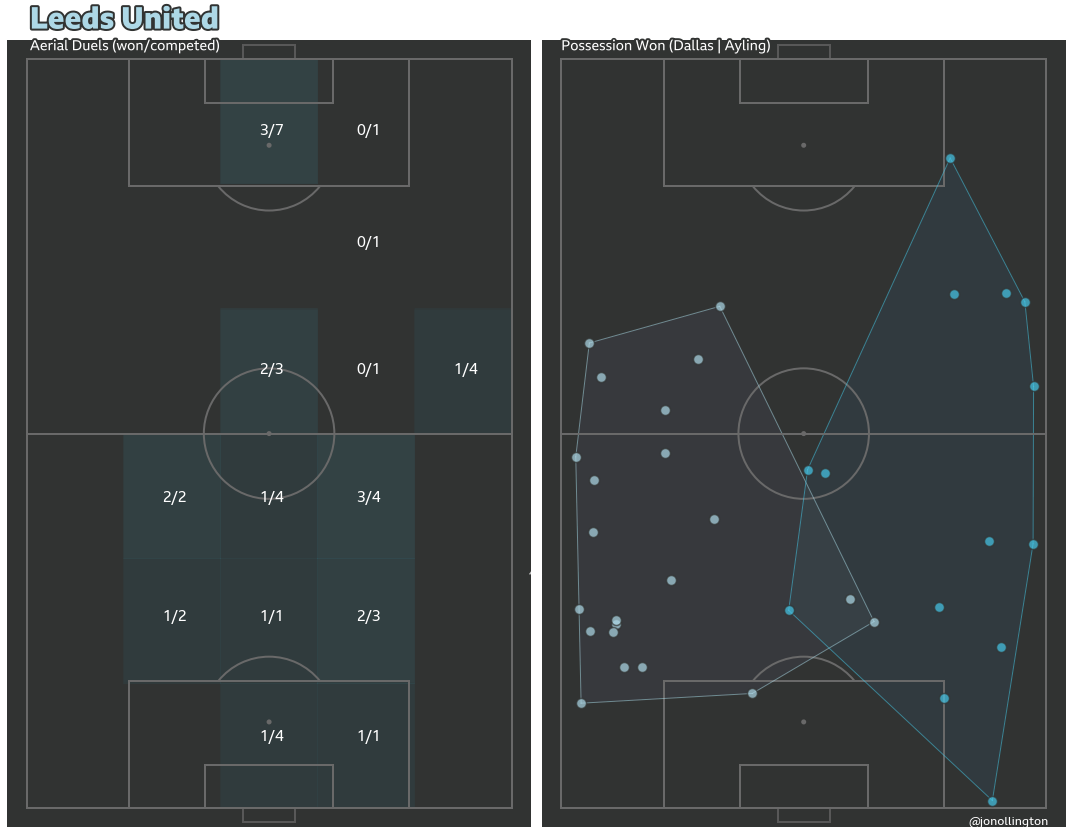

In [196]:
csfont = {'fontname':'BBC Reith Sans'}
hfont = {'fontname':'BBC Reith Sans'}

background = "#313332"
line = '#696969'
text_color ='white'
touches = '#f62681'
assisted = "#45c7e8"
goal = '#59c08a'
title_font = "BBC Reith Sans"
body_font = "BBC Reith Sans"


pitch = Pitch(pitch_type='opta', figsize=(15, 15), layout=(1, 2), line_zorder=2, goal_type='box',
              pitch_color=background, line_color=line, orientation='vertical')
# draw
fig, ax = pitch.draw()
# heatmap specified by (nx, ny) for horizontal pitch
bins = [(6, 5)]
for i, bin in enumerate(bins):
    bin_statistic = pitch.bin_statistic(suc_aerial.x, suc_aerial.y, statistic='count', bins=bin)
    # draw
    pitch.heatmap(bin_statistic, ax=ax[i], cmap=cmap, edgecolors=background, alpha=0.1)


ax[0].text(52, 9, "1/4",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(52, 25, "1/1",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(32, 25, "2/3",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(32, 41, "3/4",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(32, 58, "0/1",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(32, 75, "0/1",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(32, 90, "0/1",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(52, 41, "1/4",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(72, 25, "1/2",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(72, 41, "2/2",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(52, 58, "2/3",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(12, 58, "1/4",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(52, 90, "3/7",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(32, 9, "1/1",fontsize=15, fontfamily=body_font, color=text_color)


#----------

ax[1].scatter(dallas['y'],dallas['x'],color='lightblue', s=100, zorder=12,alpha=0.7, ec=background,lw=1.5)

for simplex in hull.simplices:
    #Draw a black line between each
    ax[1].plot(defpoints[simplex, 1], defpoints[simplex, 0], 'k-', alpha=0.5, lw=1, c='lightblue')
    ax[1].fill(defpoints[hull.vertices,1], defpoints[hull.vertices,0], 'k', alpha=0.01, color='lightblue')
    
ax[1].scatter(ayling['y'],ayling['x'],color='#45c7e8', s=100, zorder=12,alpha=0.7, ec=background,lw=1.5)

for simplex in hull1.simplices:
    #Draw a black line between each
    ax[1].plot(defpoints1[simplex, 1], defpoints1[simplex, 0], 'k-', alpha=0.5, lw=1, c='#45c7e8')
    ax[1].fill(defpoints1[hull1.vertices,1], defpoints1[hull1.vertices,0], 'k', alpha=0.01, color='#45c7e8')
    
    
n = fig.text(0.031, 0.875, "Leeds United",fontsize=30, fontfamily=body_font, color='lightblue', weight='bold',zorder=2, **csfont)
fig.text(0.211, 0.875, "vs Fulham",fontsize=25, fontfamily=body_font, color=text_color, weight='bold',zorder=2, **csfont)
n.set_path_effects([path_effects.withStroke(linewidth=4,foreground=background)])
fig.text(0.33, 0.875, " English Premier League 2020/21 | Sat 19 Sep 2020",fontsize=18, fontfamily=body_font, color=text_color,zorder=2, **csfont)
n1 = fig.text(0.031, 0.855, "Aerial Duels (won/competed)",fontsize=14, fontfamily=body_font, color='white',zorder=2, **csfont)
n1.set_path_effects([path_effects.withStroke(linewidth=4,foreground=background)])
n2 = fig.text(0.523, 0.855, "Possession Won (Dallas | Ayling)",fontsize=14, fontfamily=body_font, color='white',zorder=2, **csfont)
n2.set_path_effects([path_effects.withStroke(linewidth=4,foreground=background)])
info_string = '@jonollington'
fig.text(0.9, 0.135, info_string, color='#ffffff', ha='left', va='bottom', fontsize=12, **csfont)

#arrow
arrow="Simple,tail_width=0.4,head_width=1.3,head_length=0.9"
ax2 = fig.add_axes([0.48,0.17,0.04,0.3])
ax2.axis("off")
ax2.annotate('', (0.48,0.7),(0.48,0), zorder=10, arrowprops=dict(arrowstyle=arrow,
            linewidth=0.2,  color='#ffffff',alpha=0.7))
    
plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("convex",bbox_inches="tight",dpi=200);